# Pooling Visualization

## import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torch.nn.functional as F

## import image 

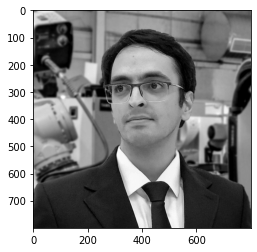

In [2]:
bgr = cv2.imread("1710797239367.jpeg")

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

gray = gray.astype("float32") / 255

plt.imshow(gray, cmap="gray")
plt.show()

## define and visualize filters

filter shape: (4, 4)
filters shape: (4, 4, 4)


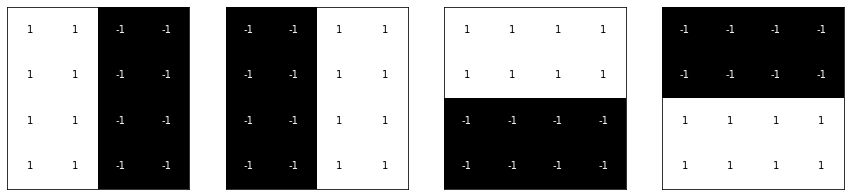

In [8]:
filter = np.array([ [ 1 , 1 , -1 , -1 ],
                     [ 1 , 1 , -1 , -1 ],
                     [ 1 , 1 , -1 , -1 ],
                     [ 1 , 1 , -1 , -1 ]])
print("filter shape:", filter.shape)
filters = np.array([filter, -filter, filter.T, -filter.T])
print("filters shape:", filters.shape)

fig = plt.figure(figsize=(15,15))
for i,filter in enumerate(filters): 
    ax = fig.add_subplot(1,4, i+1, xticks= [], yticks= [])
    ax.imshow(filter, cmap = "gray")
    w, h = filter.shape
    for x in range(w):
        for y in range(h):
            ax.annotate(str(filter[x][y]), xy = (y,x),
             horizontalalignment= "center", 
             verticalalignment = "center", 
             color = "white" if filter[x][y] < 0 else "black")

# visualize the output of each filter

In [25]:
class Net(nn.Module):
    def __init__(self,weight):
        super(Net,self).__init__()
        # get shape of filters
        k_height, k_width = weight.shape[:2]
        # convolution layer
        self.conv = nn.Conv2d(1,4, kernel_size = (k_height,k_width ), bias= False)
        # set filter weight
        self.conv.weight = nn.Parameter(weight)
        # activation function layer: relu
        self.relu = F.relu
        # pooling layer
        self.pool = nn.MaxPool2d(4,4)
    def forward(self, x):
        x_conv = self.conv(x)
        x_relu = self.relu(x_conv)
        x_pool = self.pool(x_relu)
        return x_conv, x_relu, x_pool


weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight= weight)
print(model)


Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 1), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
)


In [28]:
def vialize(layer, n_filter):
    fig = plt.figure(figsize = (20,20))

    for i in range(n_filter):
        ax = fig.add_subplot(1, n_filter, i+1, xticks=[], yticks=[])
        
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title("output %s" % str(i+1))

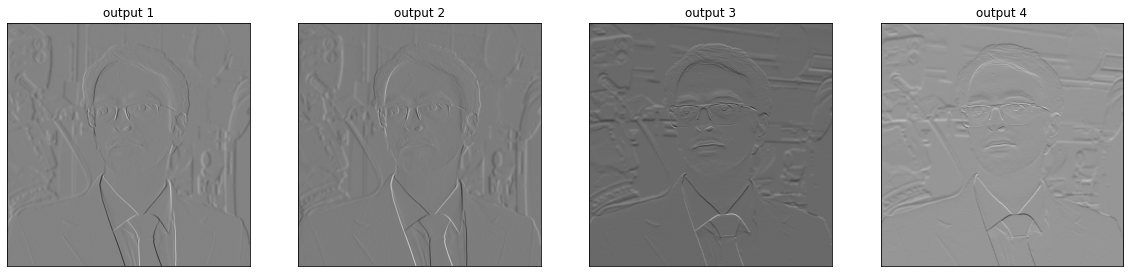

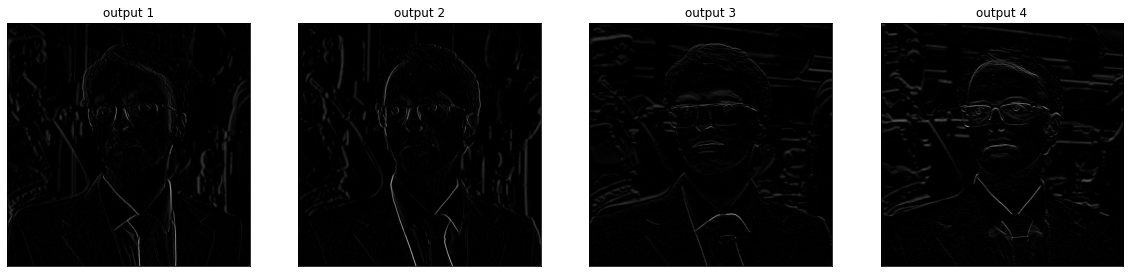

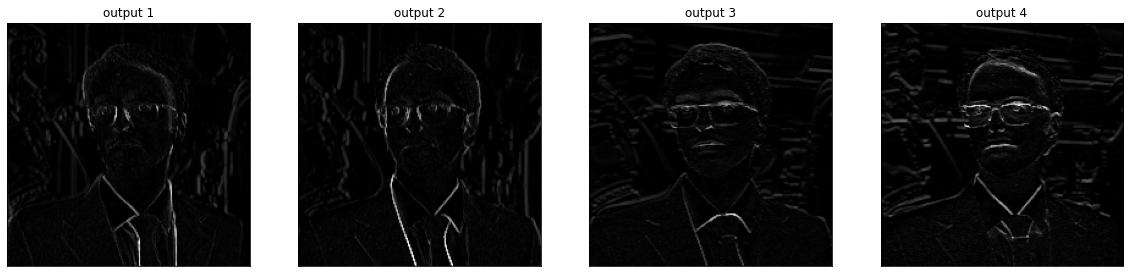

In [29]:
gray_image_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)

conv, relu, pool = model(gray_image_tensor)

vialize(conv, 4)
vialize(relu, 4)
vialize(pool, 4)